In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [28]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sn

In [31]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score

**Importing the dataset**

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
#Dropping 'UserID' column.
df = df.drop('User ID',axis = 1)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [7]:
#Encoding "Gender" column.
df['Gender'] = df['Gender'].replace(['Male','Female'],[1,0])

**Splitting the dataset into the Training set and Test set**

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x = df[['Gender','Age','EstimatedSalary']].values
y = df['Purchased'].values
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2)

**Feature Scaling**

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

**Fitting Random Forest to the Training set**

In [22]:
# #For random forest first we have to bag the result of every decision that we get from each model.
# !pip install DecisionTree
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

In [23]:
model = BaggingClassifier(tree.DecisionTreeClassifier(max_depth = 2),n_estimators=100)
model.fit(x_train,y_train)
model.score(x_train,y_train)  

0.925

**Predicting the Test set results**

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf = RandomForestClassifier(n_estimators=100,max_depth=2)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

**Making the Confusion Matrix**

In [26]:
from sklearn.metrics import  confusion_matrix, f1_score

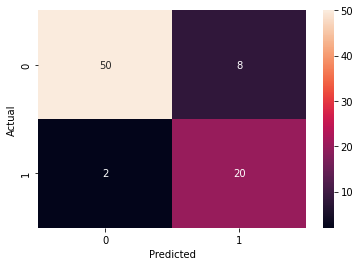

In [29]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

**Visualising the Training set results**

**Visualising the Test set results**

Test set accuracy: 0.88
Test set auc: 0.89


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


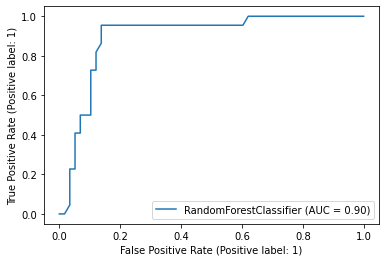

In [33]:
# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc))
plot_roc_curve(rf, x_test, y_test)